## Import Libraries

In [246]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, TargetEncoder
from sklearn.ensemble import RandomForestRegressor


In [247]:
train_url = 'data/train.csv'
test_url = 'data/test.csv'

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

train.head()

,id,Country,Year,Month,FoodPriceIndex
0,3501,Mexico,1971,11,0.0
1,60601,South Africa,2002,7,43.9
2,64399,Japan,2004,8,89.8
3,24227,France,1983,1,48.9
4,63779,Japan,2004,4,90.2


In [248]:
test.head()

,id,Country,Year,Month
0,99116,Italy,2023,4
1,97687,Denmark,2022,7
2,92061,United States,2019,6
3,95122,Netherlands,2021,2
4,92296,Italy,2019,8


### Checking Train Data

In [249]:
print("Train Data missing values:")
print(train.isna().sum())

print("Train Data duplicated: ", train.duplicated().sum())
print('-'*50)

print("Train Data Length: ", len(train))

Train Data missing values:
id                  0
Country             0
Year                0
Month               0
FoodPriceIndex    348
dtype: int64
Train Data duplicated:  0
--------------------------------------------------
Train Data Length:  11616


In [250]:
proportion_missing = train.isna().sum() / len(train)
print(proportion_missing)

id                0.000000
Country           0.000000
Year              0.000000
Month             0.000000
FoodPriceIndex    0.029959
dtype: float64


In [251]:
from category_encoders import TargetEncoder

# Initialize the TargetEncoder
te = TargetEncoder(cols=['Country'])

# Fit the encoder on the training data
train['Country'] = te.fit_transform(train[['Country']], train['FoodPriceIndex'])

missing value < 0.05 berarti kita remove aja yang missing value (`Complete Case Analysis`)

In [252]:
train

,id,Country,Year,Month,FoodPriceIndex
0,3501,25.490485,1971,11,0.0000
1,60601,25.660707,2002,7,43.9000
2,64399,80.070155,2004,8,89.8000
3,24227,62.355750,1983,1,48.9000
4,63779,80.070155,2004,4,90.2000
...,...,...,...,...,...
11611,8347,61.974369,1974,6,17.9000
11612,32121,68.830241,1987,4,66.1407
11613,8561,68.830241,1974,8,45.1606
11614,45917,59.473870,1994,9,65.6000


In [253]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Create copy of train data
# train = train.copy()

# Split data into rows with and without missing values
train_missing = train[train['FoodPriceIndex'].isna()]
train_not_missing = train[~train['FoodPriceIndex'].isna()]

# Prepare features for Random Forest
features = ['Year', 'Month', 'Country']  # Assuming 'Country_Encoded' is the encoded column

# Train Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(train_not_missing[features], train_not_missing['FoodPriceIndex'])

# Predict missing values
predictions = rf.predict(train_missing[features])

# Fill missing values
train.loc[train['FoodPriceIndex'].isna(), 'FoodPriceIndex'] = predictions

print("Number of missing values after imputation:", train['FoodPriceIndex'].isna().sum())

Number of missing values after imputation: 0


In [254]:
len(train)

11616

### Checking Test Data

In [255]:
print("Test Data missing values:")
print(test.isna().sum())

print("Test Data duplicated: ", test.duplicated().sum())

print('-'*50)

print("Train Data Length: ", len(train))

Test Data missing values:
id         0
Country    0
Year       0
Month      0
dtype: int64
Test Data duplicated:  0
--------------------------------------------------
Train Data Length:  11616


## Feature Engineering

In [256]:
# Cyclical encoding
train['Month_Sin'] = np.sin(2 * np.pi * train['Month'] / 12)
train['Month_Cos'] = np.cos(2 * np.pi * train['Month'] / 12)

# Lag feature for previous month
# train['Lag_1'] = train.groupby('Country')['FoodPriceIndex'].shift(1)

# Rolling statistics
# train['Rolling_Mean_3'] = train.groupby('Country')['FoodPriceIndex'].transform(lambda x: x.shift(1).rolling(window=3).mean())
# train['Rolling_STD_3'] = train.groupby('Country')['FoodPriceIndex'].transform(lambda x: x.shift(1).rolling(window=3).std())

# Feature interactions
# train['Year_Month'] = train['Year'] * train['Month']

train.head()

,id,Country,Year,Month,FoodPriceIndex,Month_Sin,Month_Cos
0,3501,25.490485,1971,11,0.0,-0.500000,0.866025
1,60601,25.660707,2002,7,43.9,-0.500000,-0.866025
2,64399,80.070155,2004,8,89.8,-0.866025,-0.500000
3,24227,62.355750,1983,1,48.9,0.500000,0.866025
4,63779,80.070155,2004,4,90.2,0.866025,-0.500000


In [257]:
# fill Lag_1, Rolling_Mean_3 with mean
# train['Lag_1'].fillna(train['Lag_1'].mean(), inplace=True)
# train['Rolling_Mean_3'].fillna(train['Rolling_Mean_3'].mean(), inplace=True)

# fill Rolling_STD_3 with median
# train['Rolling_STD_3'].fillna(train['Rolling_STD_3'].median(), inplace=True)

# train[cols].hist(bins=50)

In [258]:
train.isna().sum().sort_values(ascending=False)

id                0
Country           0
Year              0
Month             0
FoodPriceIndex    0
Month_Sin         0
Month_Cos         0
dtype: int64

## EDA

In [259]:
num_cols = train.select_dtypes(include=[np.number]).columns
cat_cols = train.select_dtypes(exclude=[np.number]).columns

print('Numerical Columns: ', num_cols)
print('Categorical Columns: ', cat_cols)

Numerical Columns:  Index(['id', 'Country', 'Year', 'Month', 'FoodPriceIndex', 'Month_Sin',
       'Month_Cos'],
      dtype='object')
Categorical Columns:  Index([], dtype='object')


In [260]:
train['Country'].value_counts()

Country
25.490485    528
25.660707    528
50.526282    528
53.005859    528
38.772515    528
71.803340    528
15.111868    528
51.196101    528
61.852023    528
53.095517    528
43.862136    528
55.588998    528
59.473870    528
62.104501    528
53.359259    528
59.003770    528
81.941732    528
68.830241    528
54.994912    528
62.355750    528
80.070155    528
61.974369    528
Name: count, dtype: int64

In [261]:
test['Country'].value_counts()

Country
Italy             120
Denmark           120
Luxembourg        120
South Africa      120
Austria           120
Sweden            120
Germany           120
Spain             120
Mexico            120
France            120
Greece            120
Switzerland       120
Israel            120
United Kingdom    120
Turkey            120
Taiwan, China     120
Finland           120
Portugal          120
Canada            120
Netherlands       120
United States     120
Japan             120
Name: count, dtype: int64

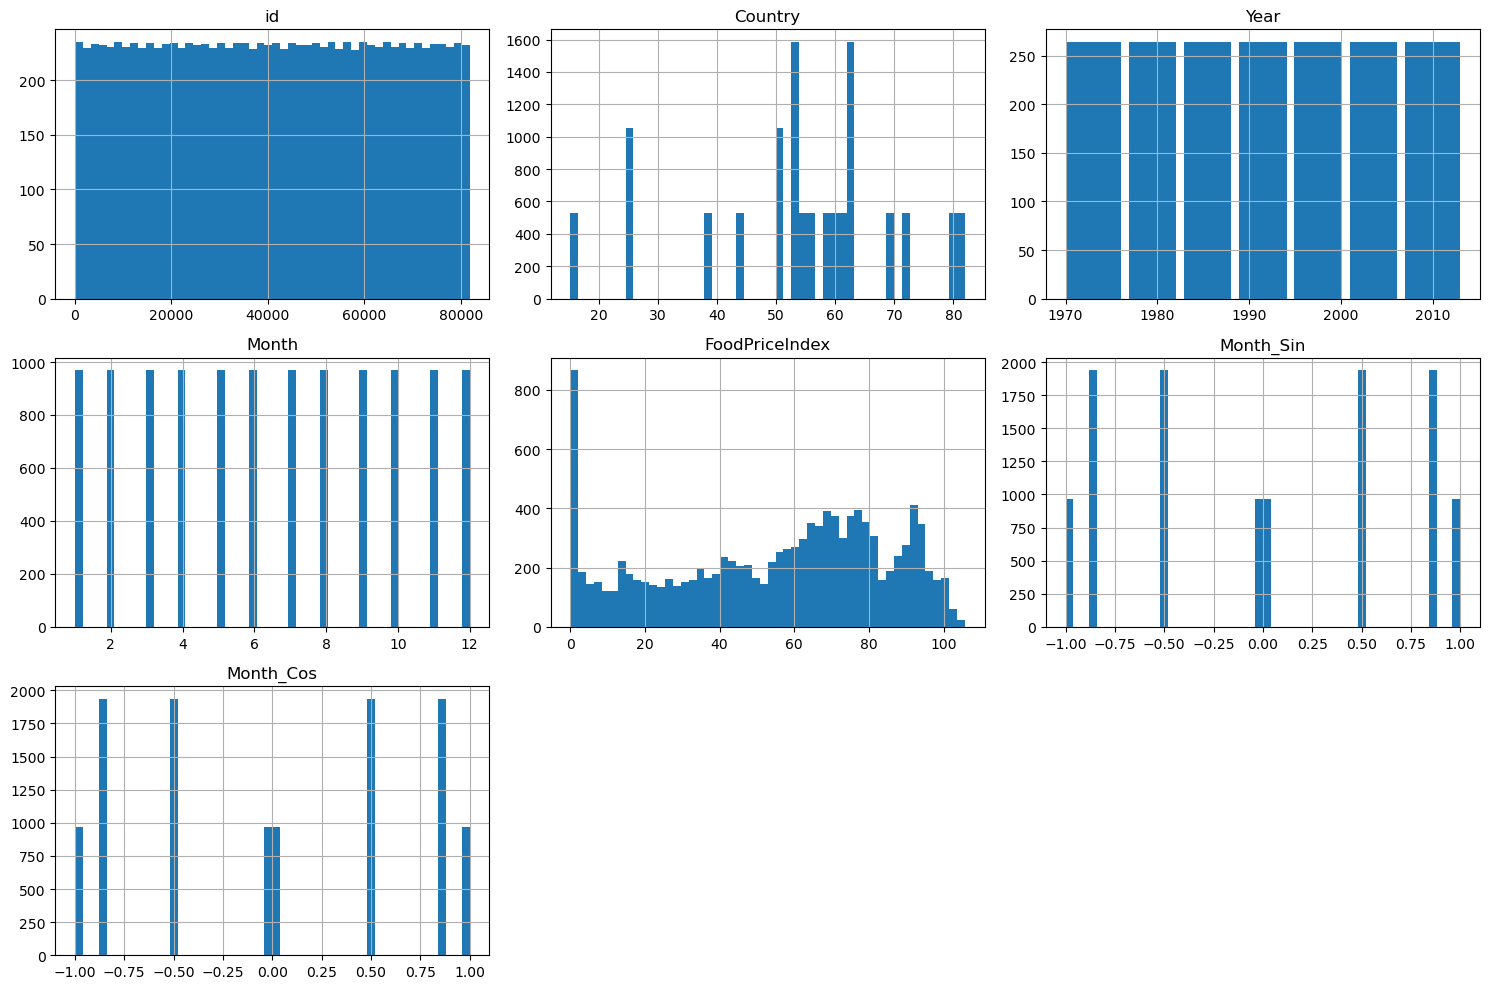

In [262]:
train[num_cols].hist(bins=50, figsize=(15, 10))
plt.tight_layout()

Might need to scale our data

### Heatmap Correlation

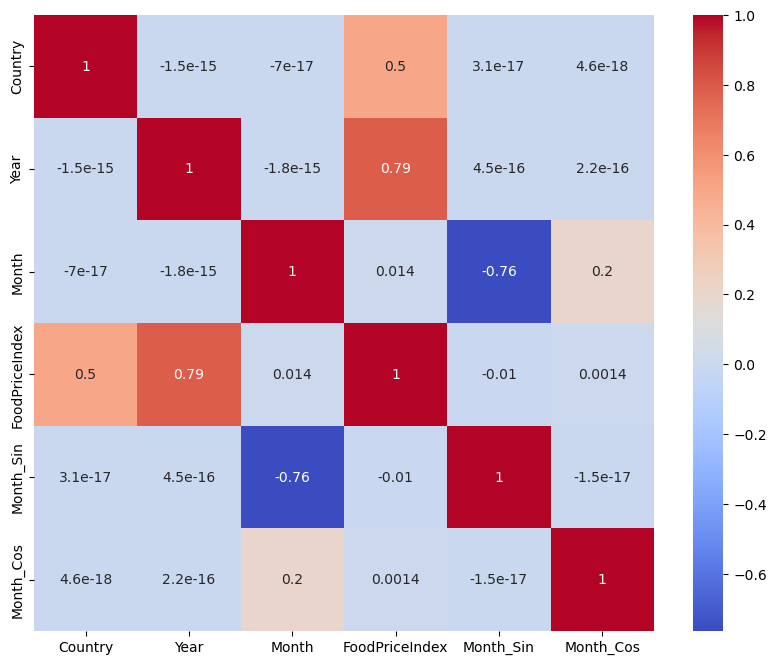

In [263]:
le = LabelEncoder()

train2 = train.copy()

train2['Country'] = le.fit_transform(train2['Country'])

corr_mat = train2.drop('id', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

Yang paling berpengaruh dengan `FoodIndex` hanya Year dengan hasil korelasi pearson 0.79.

Method yang bisa diuji (Time Series Forecasting):
- Arima
- Prophet
- RandomForestRegressor

No need to handle outlier, karena data kita juga terdistribusi uniform.

## Modelling

In [264]:
X = train.drop(columns=['FoodPriceIndex', 'id'])
y = train['FoodPriceIndex']

In [265]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((9873, 5), (1743, 5), (9873,), (1743,))

In [266]:
# set Country to TargetEncoder using category_encoders library
import category_encoders as ce


te = ce.TargetEncoder(cols=['Country'])
X_train = te.fit_transform(X_train, y_train)
X_val = te.transform(X_val)

In [267]:
X_train

,Country,Year,Month,Month_Sin,Month_Cos
7443,49.886306,1984,7,-5.000000e-01,-8.660254e-01
5270,63.004185,1974,7,-5.000000e-01,-8.660254e-01
7049,63.004185,2004,5,5.000000e-01,-8.660254e-01
9658,71.658636,2011,2,8.660254e-01,5.000000e-01
7318,54.955142,1989,9,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...
11284,39.059685,1978,9,-1.000000e+00,-1.836970e-16
5191,59.620220,1991,5,5.000000e-01,-8.660254e-01
5390,62.380176,2006,9,-1.000000e+00,-1.836970e-16
860,55.972374,1979,12,-2.449294e-16,1.000000e+00


Evaluasi metrik

In [268]:
# Calculate sMAPE
def smape(A, F):
    denominator = np.abs(A) + np.abs(F)
    numerator = 2 * np.abs(F - A)
    # print(f"Denominator: {denominator}")
    # print(f"Numerator: {numerator}")
    return 100/len(A) * np.sum(numerator / denominator)


c:\Users\ardav\miniconda3\envs\vsc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ardav\miniconda3\envs\vsc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ardav\miniconda3\envs\vsc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


sMAPE: 68.94%


c:\Users\ardav\miniconda3\envs\vsc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ardav\miniconda3\envs\vsc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


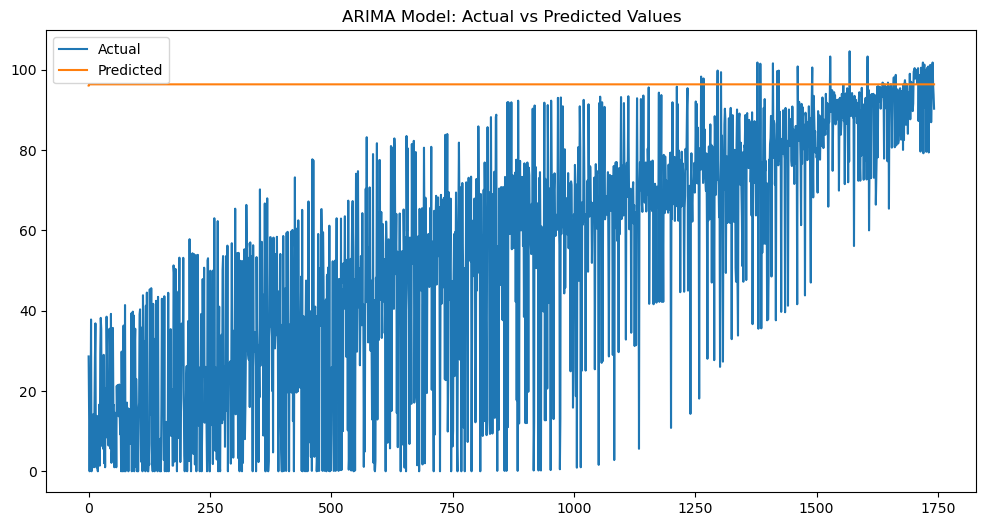

In [269]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Sort data by Year and Month to ensure time series order
X_train_sorted = pd.concat([y_train, X_train], axis=1).sort_values(['Year', 'Month'])
X_val_sorted = pd.concat([y_val, X_val], axis=1).sort_values(['Year', 'Month'])

# Fit ARIMA model
model = ARIMA(X_train_sorted['FoodPriceIndex'], order=(1,1,1))
results = model.fit()

# Make predictions
predictions = results.forecast(steps=len(y_val))

smape_arima = smape(X_val_sorted['FoodPriceIndex'].values, predictions.values)
print(f'sMAPE: {smape_arima:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(predictions.values, label='Predicted')
plt.title('ARIMA Model: Actual vs Predicted Values')
plt.legend()
plt.show()

c:\Users\ardav\miniconda3\envs\vsc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ardav\miniconda3\envs\vsc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


sMAPE: 75.75%


c:\Users\ardav\miniconda3\envs\vsc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ardav\miniconda3\envs\vsc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


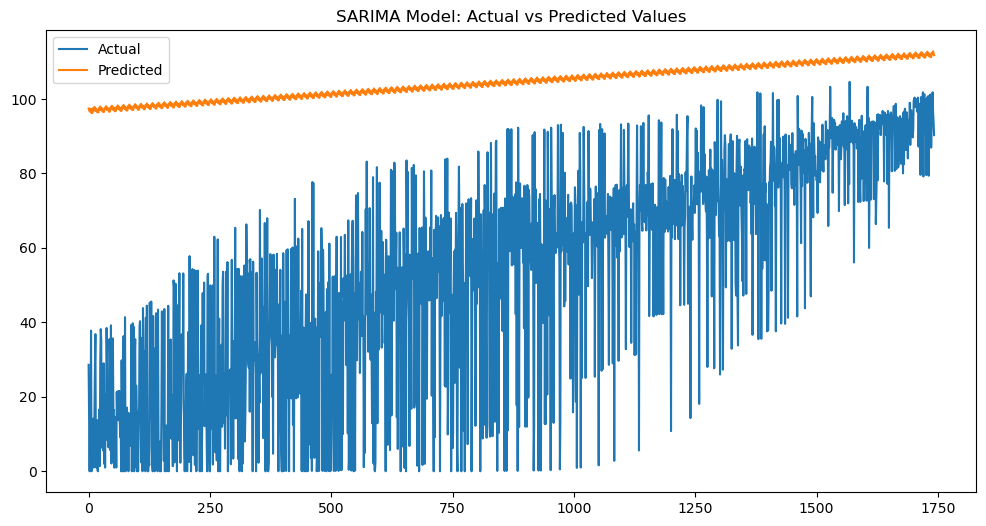

In [270]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Sort data by Year and Month to ensure time series order
X_train_sorted = pd.concat([y_train, X_train], axis=1).sort_values(['Year', 'Month'])
X_val_sorted = pd.concat([y_val, X_val], axis=1).sort_values(['Year', 'Month'])

# Fit SARIMA model
# Using order=(1,1,1) for ARIMA part and seasonal_order=(1,1,1,12) for seasonal part
model = SARIMAX(X_train_sorted['FoodPriceIndex'], 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12))
results = model.fit()

# Make predictions
predictions = results.forecast(steps=len(y_val))

smape_sarima = smape(X_val_sorted['FoodPriceIndex'].values, predictions.values)
print(f'sMAPE: {smape_sarima:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(predictions.values, label='Predicted')
plt.title('SARIMA Model: Actual vs Predicted Values')
plt.legend()
plt.show()

00:22:20 - cmdstanpy - INFO - Chain [1] start processing
00:22:21 - cmdstanpy - INFO - Chain [1] done processing


sMAPE: 40.95%


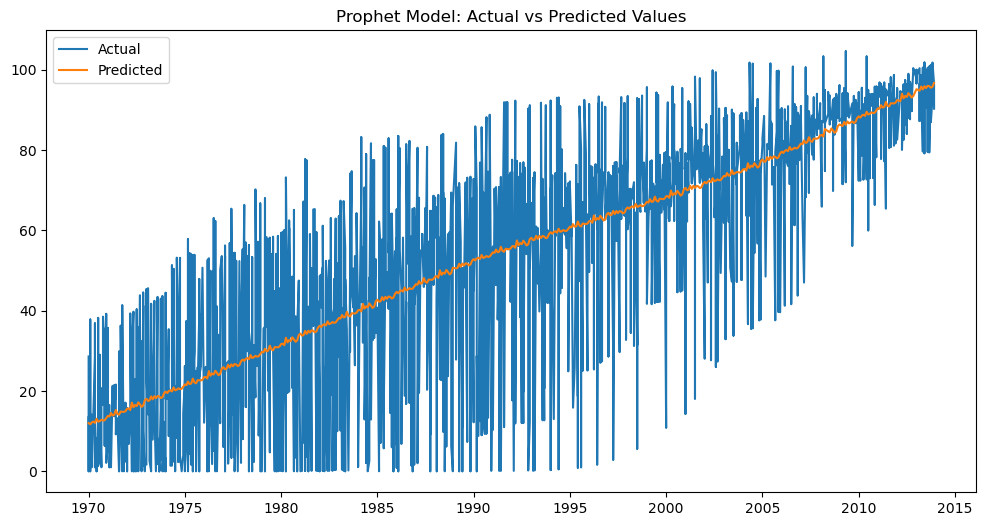

In [271]:
from prophet import Prophet

# Prepare data for Prophet (requires 'ds' and 'y' columns)
# Sort by date and reset index
prophet_train = pd.DataFrame({
    'ds': pd.to_datetime(X_train_sorted['Year'].astype(str) + '-' + X_train_sorted['Month'].astype(str) + '-01'),
    'y': X_train_sorted['FoodPriceIndex']
})

prophet_val = pd.DataFrame({
    'ds': pd.to_datetime(X_val_sorted['Year'].astype(str) + '-' + X_val_sorted['Month'].astype(str) + '-01'),
    'y': X_val_sorted['FoodPriceIndex']
})

# Fit Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(prophet_train)

# Make predictions
forecast = model.predict(prophet_val)

# Calculate sMAPE
smape_prophet = smape(prophet_val['y'].values, forecast['yhat'].values)
print(f'sMAPE: {smape_prophet:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(prophet_val['ds'], prophet_val['y'], label='Actual')
plt.plot(prophet_val['ds'], forecast['yhat'], label='Predicted')
plt.title('Prophet Model: Actual vs Predicted Values')
plt.legend()
plt.show()

In [272]:
X_val_sorted.columns

Index(['FoodPriceIndex', 'Country', 'Year', 'Month', 'Month_Sin', 'Month_Cos'], dtype='object')

In [273]:
train_sorted = X_train_sorted.copy()
val_sorted = X_val_sorted.copy()


X_train_sorted = train_sorted.drop(['FoodPriceIndex'], axis=1)
y_train_sorted = train_sorted['FoodPriceIndex']

X_val_sorted = val_sorted.drop(['FoodPriceIndex'], axis=1)
y_val_sorted = val_sorted['FoodPriceIndex']

sMAPE: 1.46%


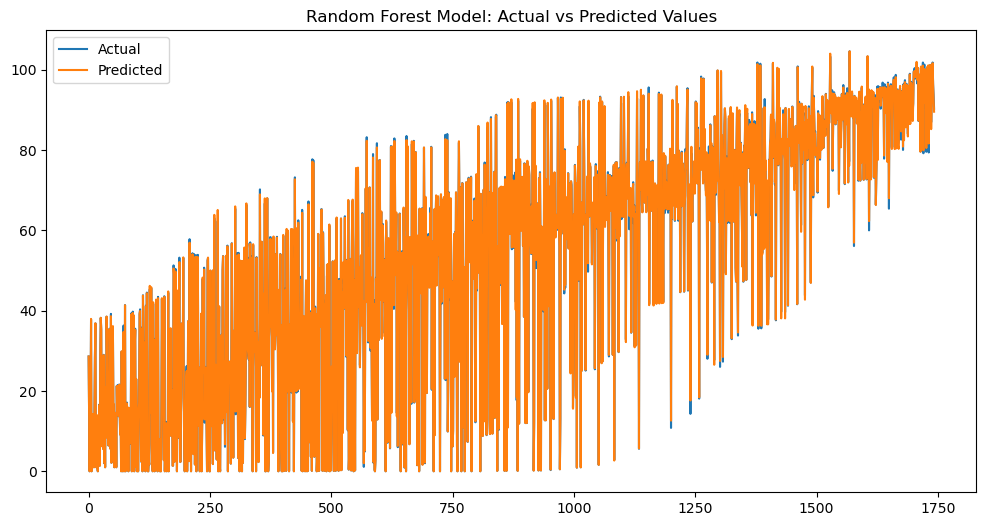

In [274]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_sorted, y_train_sorted)

# Make predictions
rf_predictions = rf_model.predict(X_val_sorted)

# Calculate sMAPE
def smape(y_true, y_pred, epsilon=1e-10):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + epsilon))

smape_rf = smape(y_val_sorted.values, rf_predictions)
print(f'sMAPE: {smape_rf:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_val_sorted.values, label='Actual')
plt.plot(rf_predictions, label='Predicted')
plt.title('Random Forest Model: Actual vs Predicted Values')
plt.legend()
plt.show()

sMAPE: 1.88%


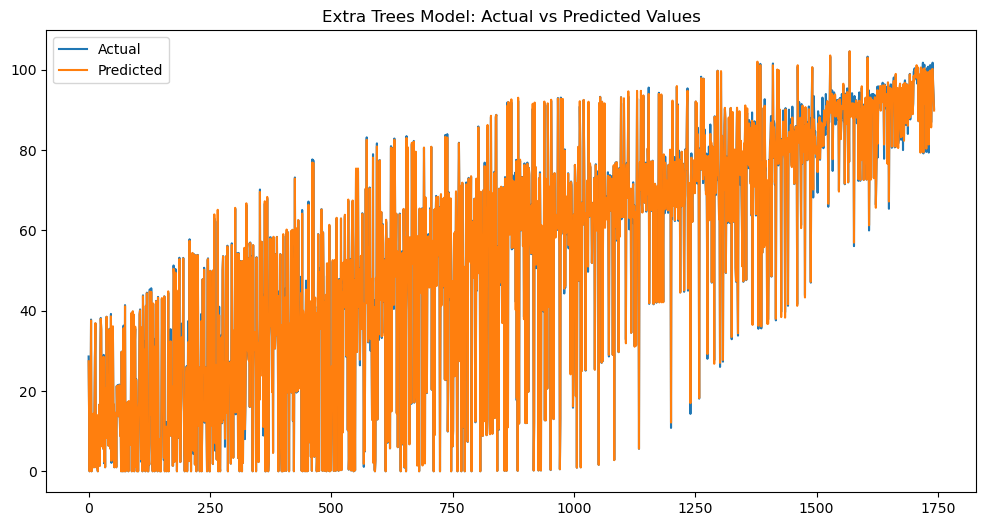

In [275]:
# Initialize and train the model
from sklearn.ensemble import ExtraTreesRegressor

ex_model = ExtraTreesRegressor(n_estimators=150, random_state=0)
ex_model.fit(X_train_sorted, y_train_sorted)

# Make predictions
ex_predictions = ex_model.predict(X_val_sorted)

# Calculate sMAPE
def smape(y_true, y_pred, epsilon=1e-10):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + epsilon))

smape_rf = smape(y_val_sorted.values, ex_predictions)
print(f'sMAPE: {smape_rf:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_val_sorted.values, label='Actual')
plt.plot(ex_predictions, label='Predicted')
plt.title('Extra Trees Model: Actual vs Predicted Values')
plt.legend()
plt.show()

sMAPE: 1.19%


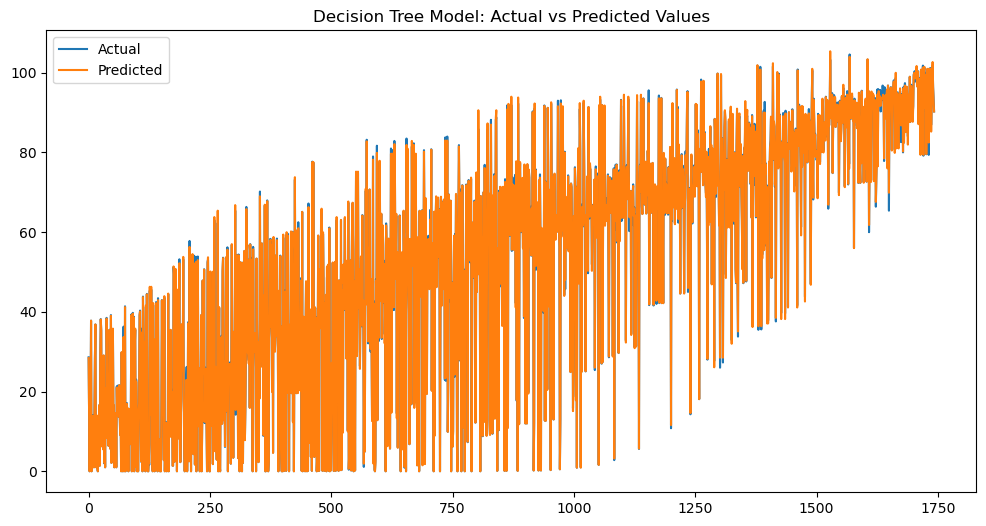

In [276]:
# Initialize and train the model
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=123)
dt_model.fit(X_train_sorted, y_train_sorted)

# Make predictions
dt_predictions = dt_model.predict(X_val_sorted)

# Calculate sMAPE
def smape(y_true, y_pred, epsilon=1e-10):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + epsilon))

smape_rf = smape(y_val_sorted.values, dt_predictions)
print(f'sMAPE: {smape_rf:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_val_sorted.values, label='Actual')
plt.plot(dt_predictions, label='Predicted')
plt.title('Decision Tree Model: Actual vs Predicted Values')
plt.legend()
plt.show()

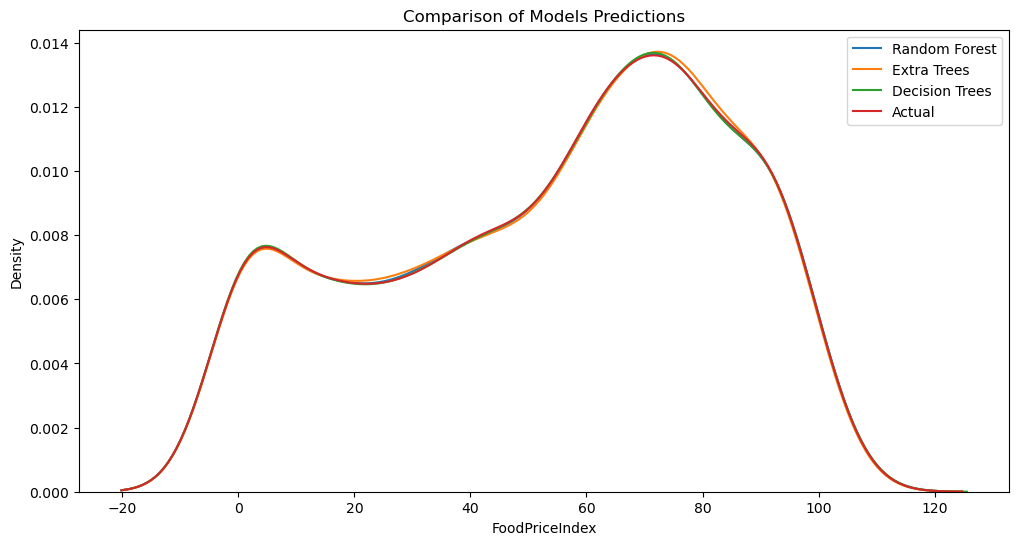

In [277]:
# kdeplot comparison between models predictions
plt.figure(figsize=(12, 6))
sns.kdeplot(rf_predictions, label='Random Forest')
sns.kdeplot(ex_predictions, label='Extra Trees')
sns.kdeplot(dt_predictions, label='Decision Trees')
sns.kdeplot(y_val_sorted, label='Actual')
plt.title('Comparison of Models Predictions')
plt.legend()
plt.show()


## Apply to test set

In [279]:
test.drop('id', axis=1, inplace=True)
test.head()

,Country,Year,Month
0,Italy,2023,4
1,Denmark,2022,7
2,United States,2019,6
3,Netherlands,2021,2
4,Italy,2019,8


In [282]:
# Cyclical encoding
test['Month_Sin'] = np.sin(2 * np.pi * test['Month'] / 12)
test['Month_Cos'] = np.cos(2 * np.pi * test['Month'] / 12)

test.head()

,Country,Year,Month,Month_Sin,Month_Cos
0,Italy,2023,4,8.660254e-01,-0.500000
1,Denmark,2022,7,-5.000000e-01,-0.866025
2,United States,2019,6,1.224647e-16,-1.000000
3,Netherlands,2021,2,8.660254e-01,0.500000
4,Italy,2019,8,-8.660254e-01,-0.500000


In [283]:
te.fit(train['Country'], train['FoodPriceIndex'])  # Fit on training data
test['Country'] = te.transform(test['Country'])  # Transform test data

In [284]:
# apply predictions
test['FoodPriceIndex'] = dt_model.predict(test)
test

,Country,Year,Month,Month_Sin,Month_Cos,FoodPriceIndex
0,54.125349,2023,4,8.660254e-01,-5.000000e-01,102.9
1,54.125349,2022,7,-5.000000e-01,-8.660254e-01,102.6
2,54.125349,2019,6,1.224647e-16,-1.000000e+00,102.3
3,54.125349,2021,2,8.660254e-01,5.000000e-01,102.6
4,54.125349,2019,8,-8.660254e-01,-5.000000e-01,103.1
...,...,...,...,...,...,...
2635,54.125349,2022,2,8.660254e-01,5.000000e-01,102.6
2636,54.125349,2020,4,8.660254e-01,-5.000000e-01,102.9
2637,54.125349,2017,1,5.000000e-01,8.660254e-01,101.9
2638,54.125349,2020,3,1.000000e+00,6.123234e-17,102.1


## Submit

In [285]:
submission = pd.read_csv('data/sample_submission.csv')
submission.head()

,id,FoodPriceIndex
0,99116,20.5
1,97687,20.5
2,92061,20.5
3,95122,20.5
4,92296,20.5


In [286]:
submission['FoodPriceIndex'] = test['FoodPriceIndex']
submission

,id,FoodPriceIndex
0,99116,102.9
1,97687,102.6
2,92061,102.3
3,95122,102.6
4,92296,103.1
...,...,...
2635,96922,102.6
2636,93502,102.9
2637,87476,101.9
2638,93366,102.1


<Axes: xlabel='FoodPriceIndex', ylabel='Density'>

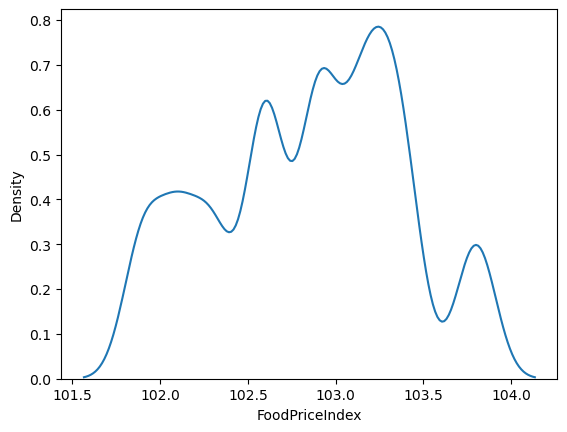

In [288]:
sns.kdeplot(submission['FoodPriceIndex'])

In [289]:
submission.to_csv("submission/submission_feature_engined_dt.csv", index=False)